### ZJ_Zhang_Project 2 

##### Group mumber: Gege Li, Zhijing Zhang


# Part 1: Introduction

##### a.	Summary of the type of data:
We choose Airbnb listings and metrics in NYC in 2019 from the open data dataset in Kaggle. This data set is about the guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. And this dataset describes the listing activity and metrics in NYC, NY for 2019.

##### b.	Research question:
Our research question is: According to this data, if we want to open a new airbnb in New York City, what should we think about and how to decide the price and location? (For example, we need to open this airbnb in a popular location so that there will be more guests. And we can analysis the better location to open our airbnb from this data.)



# Part 2: Data Summary

We acquired our data from this website: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data.

This data contains 16 columns. 
- Id means listing id, name means name of the listing. Also host_id and host_name. They are all categorical and nominal.
- Neighbourhood_group means location, neighbourhood means area. This two are categorical and nominal. 
- Latitude and longitude means the latitude and longitude coordinates. This two are numeric and continuous variables. 
- Room type is listing space type which divided into entire home and private room. It is categorical and norminal. 
- Price is price in dollar for each night and this is a numeric and continuous variable. 
- Minimum_nights means the amount of nights minimum and it is a numeric and interval data. 
- Number of reviews means how many people choose this airbnb, because reviews can only be submit after they registered and choose it. This is a numeric and interval variable. 
- Last view is a categorical and nominal. Review per month means the number of reviews per month. We think this column is numeric and continuous variable.
- Calculated host listings count means the amount of listing per host. Availability 365 means the number of days when listing is available for booking. This two are numeric and interval.

If we want to find a better location for our airbnb, we can use the latitude, longitude and number of reviews these three columns to analysis. The location that people review most is better. We can also analysis the better price we can set for our airbnb. Use price and number of reviews columns to find the most popular price that people review most. Then we can set our price similar to this one. In that way we can make sure our airbnb in a suitable price both for guests and host.

We can analysis lots of other information from this data. For example, What can we learn about different hosts and areas? What can we learn from predictions(ex: locations, prices, reviews, etc)? Which hosts are the busiest and why? Is there any noticeable difference of traffic among different areas and what could be the reason for it?  ect.

But this time we only focus on the location and price, so the attributes we need are latitude, longitude, price and number of reviews.



# Part 3: Exploratory Data Analysis (EDA)

In our research question, we need to find the better location and price for our new airbnb. After we preliminary analysis the data, we find that most airbnb data focus on the price under 500. And we don't want our airbnb to be too expensive, so we choose the data that price under 500 to analysis. 

### First of all, we should read our csv data and show all the attributes.

%matplotlib notebook

In [3]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt
# load the seaborn library
import seaborn as sns

# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-5400/master/AB_NYC_2019.csv')
# print the head of the data to make sure we can read it.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Then we do the summary statistics for each attribute we need (price, latitude, longitude and number of reviews) using both Matplotlib and Seaborn.
 
##### First one is price. Because all the data we need should be price under 500, so we do the price first.
- choose the data that price under 500. 
- use plt.hist(matplotlib) and sns.displot(seaborn) to draw a histgram. 
- set the bins of these two histogram using plt.locator_params. 
- put this two histgrams in order using plt.subplot to define their position. 
- give the plot a title named 'histogram of price' using plt.title.
- Show the plt then we can see these two histograms. 
- Because we choose the range of the price, so we should to check the averange and outlier of price using plt.boxplot.

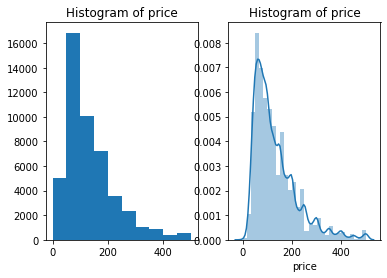

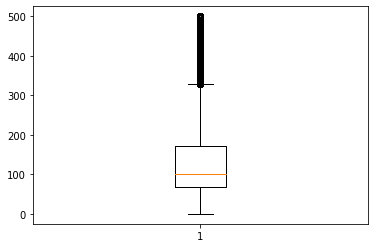

In [4]:
# we choose the price below 500
df = df[df['price'] <= 500]

# matplotlib- price

# define a new figure for plotting
plt.figure(1)

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(121)

# define the type of plot you want to appear
plt.hist(df['price'])

# give the plot a title
plt.title('Histogram of price')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=5, axis = 'x')


# seaborn-price

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 30
# Note that seaborn uses'distplot' for histograms, while matplotlib
# use 'hist':
# plt.hist(data) <= Matplotlib histogram function
sns.distplot(df['price'], bins = 30)

# give the plot a title
plt.title('Histogram of price')

plt.show()

#check the averange and outlier of 'price' using boxplot
plt.boxplot(df['price'])
plt.show()

From the charts above, we can find that most airbnb price are approximatively 100. When the price become more expensive, the airbnb become less. We can find from the boxplot that the average of airbnb price is also approximatively 100.

##### Second one is latitude.
- use plt.hist(matplotlib) and sns.displot(seaborn) to draw a histgram of 'latitude'. 
- set the bins of these two histogram using plt.locator_params. 
- put this two histgrams in order using plt.subplot to define their position. 
- give the plot a title named 'histogram of latitude' using plt.title.
- show the plt then we can see these two histograms.

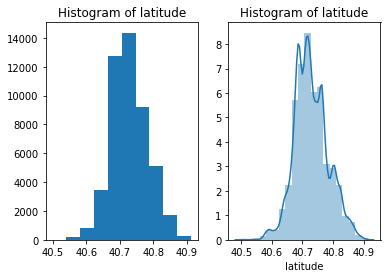

In [5]:
# matplotlib-latitude

# define a new figure for plotting
plt.figure(1)

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(121)

# define the type of plot you want to appear
plt.hist(df['latitude'])

# give the plot a title
plt.title('Histogram of latitude')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=5, axis = 'x')


# seaborn-latitude

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 20
# Note that seaborn uses'distplot' for histograms, while matplotlib
# use 'hist':
# plt.hist(data) <= Matplotlib histogram function
sns.distplot(df['latitude'], bins = 20)

# give the plot a title
plt.title('Histogram of latitude')

plt.show()

From the histogram of latitude above, we can find that most airbnb are located on the latitude approximately 40.75. Most of the airbnb located on latitude between 40.65 to 40.80.

##### Third one is longitude
- use plt.hist(matplotlib) and sns.displot(seaborn) to draw a histgram of 'longitude'. 
- set the bins of these two histogram using plt.locator_params. 
- put this two histgrams in order using plt.subplot to define their position. 
- give the plot a title named 'histogram of longitude' using plt.title.
- show the plt then we can see these two histograms.

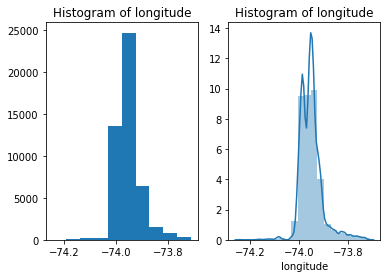

In [6]:
# matplotlib- longitude

# define a new figure for plotting
plt.figure(1)

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(121)

# define the type of plot you want to appear
plt.hist(df['longitude'])

# give the plot a title
plt.title('Histogram of longitude')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=5, axis = 'x')


# seaborn-longitude

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 20
# Note that seaborn uses'distplot' for histograms, while matplotlib
# use 'hist':
# plt.hist(data) <= Matplotlib histogram function
sns.distplot(df['longitude'], bins = 20)

# give the plot a title
plt.title('Histogram of longitude')

plt.show()

From the histogram of longitude above, we can find that most airbnb are located on the longitude approximately -73.95. Most of the airbnb located on the longitude between -74.0 to -73.9.

##### Last one is number of reviews
- use plt.hist(matplotlib) and sns.displot(seaborn) to draw a histgram of 'number_of_reviews'. 
- set the bins of these two histogram using plt.locator_params. 
- put this two histgrams in order using plt.subplot to define their position. 
- give the plot a title named 'number_of_reviews' using plt.title.
- show the plt then we can see these two histograms.

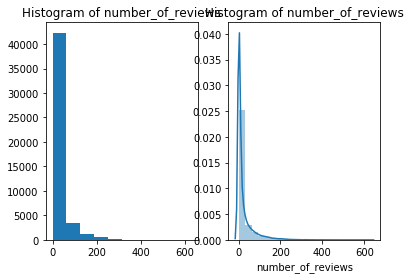

In [7]:
# matplotlib - number_of_reviews

# define a new figure for plotting
plt.figure(1)

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(121)

# define the type of plot you want to appear
plt.hist(df['number_of_reviews'])

# give the plot a title
plt.title('Histogram of number_of_reviews')

# specify the number of bins to use in the histogram
plt.locator_params(nbins=5, axis = 'x')


# seaborn - number_of_reviews

# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 20
# Note that seaborn uses'distplot' for histograms, while matplotlib
# use 'hist':
# plt.hist(data) <= Matplotlib histogram function
sns.distplot(df['number_of_reviews'], bins = 20)

# give the plot a title
plt.title('Histogram of number_of_reviews')

plt.show();

From the histogram of number of reviews above, we can find that most number of reviews are under 200. And the peak is even under 50. That means lots of airbnb have approximately 50 reviews. The chart is a little strange but that make sense. Because even the most popular airbnb with minimum night only one night cannot be booked more than 365 times in one year. So most of the airbnb reviews are under 200 and most are close to 50.

# Part 4: Inference

### Find the better price for our new airbnb
We use number of reviews and price to draw a scatter plot both use matplotlib and seaborn. We think that if the airbnb have most reviews, the price is better to be set similar to this one. Because that means people book this airbnb in that price more ofren, so we can have more guests.

- use plt.scattter(matplotlib) and sns.scatterplot(seaborn) to draw a scatterplot of 'price' and 'number_of_reviews'. 
- set the X axis and Y axis of the scatterplot. 
- put this two scatterplot in order using plt.subplot to define their position. 
- give the plot a title named 'scatterplot of PvsN' using plt.title.
- show the plt then we can see these two histograms.


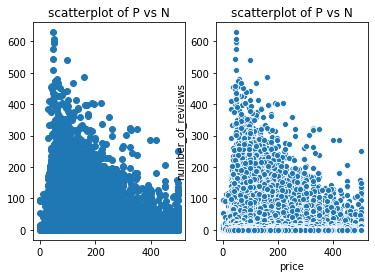

In [8]:
# matplotlib - price vs. number_of_reviews
plt.figure(1)

plt.subplot(121)
plt.title('scatterplot of P vs N')

# scatterplot of price vs. number_of_reviews
plt.scatter(x = df['price'] , y = df['number_of_reviews'])

# seaborn - price vs. number_of_reviews
plt.subplot(122)
plt.title('scatterplot of P vs N')

# scatterplot of price vs. number_of_reviews
sns.scatterplot(x = 'price', y = 'number_of_reviews', data = df);

plt.show()

From the scatterplot showed above, we can find that when the price become higher, the reviews become less. These two attributes are in positive correlation. And the most review focus on the price near 50. That means people perfer the airbnb at lower price. 

We can set our price under 100 but over 50. And the exact price depends on the exact room configuration. Because setting price is not just a single thing, we can get the better range from this scatterplot and still need to think a lot about the exact price.

### Find the better location for our new airbnb
 
We want to use the number of reviews, latitute, longitude and neighbourhood to find the better place to open our new airbnb. Using the function in folium library to draw a New York City map. Then And connect our airbnb data into this map. In this way we can see the popular location of airbnb. We can choose the most popular location to open our new airbnb. 

The bigger the circle is, the hoter the place is.

- install folium. 
- create two new functions 
  
  get_review_counts()  
  plot_review_counts(counts)
- show real data


In [9]:
import pandas as pd
import folium

airbnb_data = pd.read_csv("https://raw.githubusercontent.com/gegeli638/DAV-5400/master/AB_NYC_2019.csv")
#airbnb_data.head()

#### pre-processing data
We'll write a function that does the following:

- generate a DataFrame containing locations of neighbourhood
- generates a DataFrame containing sum of the number of review for each neighbourhood
- join the two dataframes into one.

In [10]:
def get_review_counts():
    # make a DataFrame with locations for each bike station
    locations = airbnb_data.groupby("neighbourhood").first()
    locations = locations.loc[:, ["latitude",
                                 "longitude"]]
    
    # make a DataFrame with review_counts for sum of number_of_reviews group by neighbourhood
    review_counts = airbnb_data.groupby(by=['neighbourhood'])['number_of_reviews'].sum()    
    # convert the series to the dataframe
    review_counts = review_counts.to_frame() 
    review_counts.columns= ["Review Counts"]
    
    # join the locations and review_counts dataframes
    counts = review_counts.join(locations)
    return counts

# print a sample to check
get_review_counts().head()

,Review Counts,latitude,longitude
neighbourhood,,,
Allerton,1803,40.86466,-73.85709
Arden Heights,31,40.56033,-74.18259
Arrochar,307,40.59251,-74.06479
Arverne,2253,40.59783,-73.80158
Astoria,19310,40.75384,-73.91433


#### write a function that generates a  folium map and adds circle markers for each station
- folium.Map function to generate a NY map using coordinate parameter
- set format of message show the location and number of review
- set the format of circle
- add marker to the map

In [11]:
def plot_review_counts(counts):
    # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in counts.iterrows():
        
        neighbourhood = index
        
        # generate the popup message that is shown on click.
        popup_text = "{} <br> review_counts: {}"
        popup_text = popup_text.format(neighbourhood,
                          row["Review Counts"],)
        
        # radius of circles
        radius = row["Review Counts"] / 1000
        color="#E37222" # tangerine
        
        # choose the color of the marker
        if row["Review Counts"]> 300:
            color="#E37222" # tangerine
        else:   
            color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

#### show the real data
- using the functions we create above

In [12]:
# plot review above 

counts = get_review_counts()
plot_review_counts(counts)

From the map above we can see that the most popular place is Bedford-Stuyvesant where have the most reviews. This means people booked airbnb in this area more often. So if we open our airbnb in this area, we can have more guests and this is good for our airbnb to get profit.

# Part 5: Conclusion
 
From all the graph and analysis above we can draw a conclusion for our new airbnb. 
- The price should be over 50 and under 100. Because from the data we find that most airbnb price are near 100 per night and the highest review airbnb price is approcimately 50. We don't want our airbnb to be too expensive but we also need our airbnb to ger profit. So we decide to set our price between 50 and 100 by analysis the price and number of reviews data.
- The location should be Bedford-Stuyvesant, in Brooklyn. Because through the map we can see this area have the largest circle. That means lots of airbnb located in this area and people booked airbnb in this area more often. So if we open our airbnb here we can have more gusets.
- In addition, about our new airbnb, we also need to think more about the other factors. For example, the exact price should depends on the exact room configuration such as pillows, blanket ect.